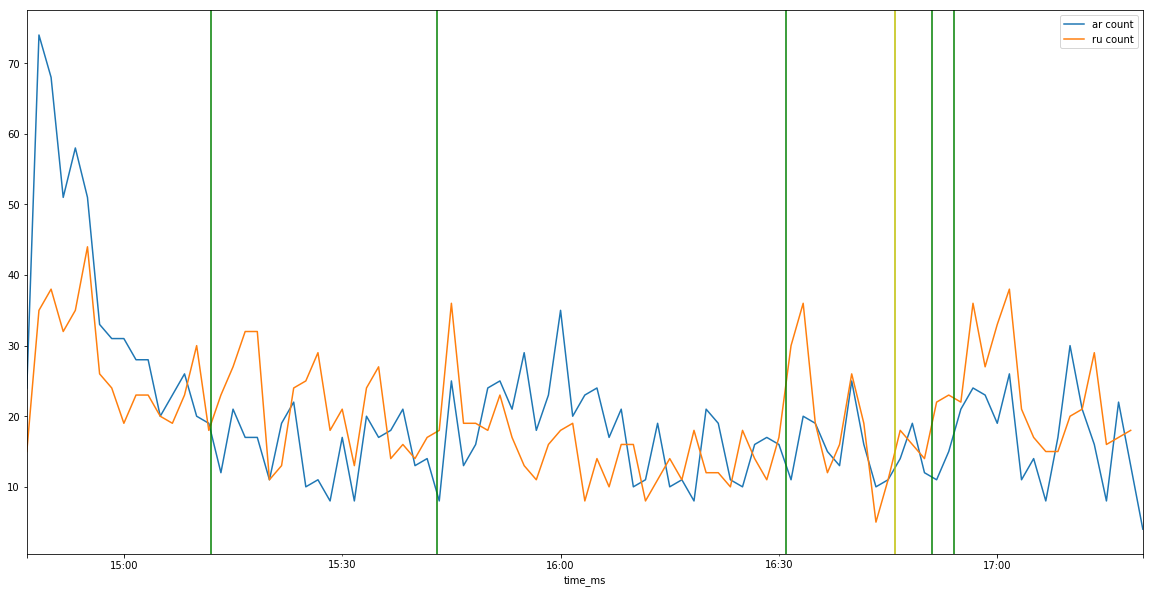

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# kickoff 17:01, 
# goal at: 12, 43, 71, 91, 94

df = pd.read_csv('first-game-panda-frame_med.csv')

df['time_ms'] = pd.to_datetime(df['time_ms'], unit='ms')
df = df.set_index('time_ms')

ar = df[df['lang'] == 'ar']
ru = df[df['lang'] == 'ru']

plt.figure(figsize=(20,10))

v = 'anger' #sentiment,anger,joy,sadness,fear,surprise
f = '100S'
ar[v].resample(f).count().plot(label='ar count')
ru[v].resample(f).count().plot(label='ru count')

from datetime import datetime
plt.axvline(x=datetime.strptime('2018-06-14 15:12', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 15:43', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:31', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:51', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:54', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:46', '%Y-%m-%d %H:%M'), color='y')

plt.legend(bbox_to_anchor=(1, 1))

0 days 00:00:50


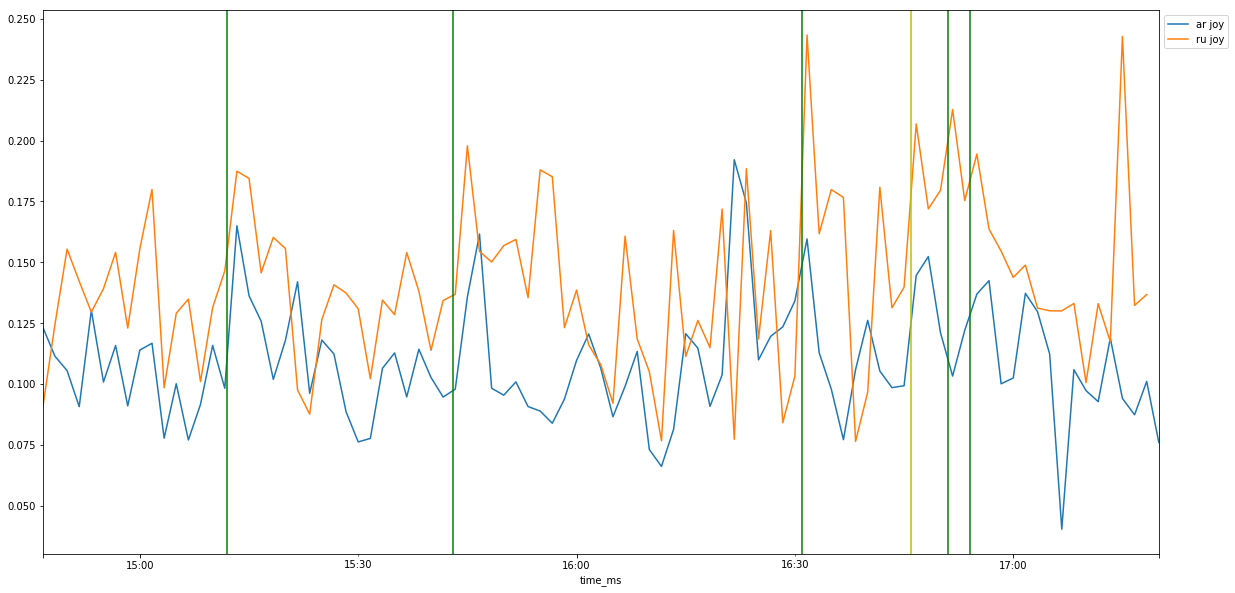

In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# kickoff 17:01, 
# goal at: 12, 43, 71, 91, 94

df = pd.read_csv('first-game-panda-frame_med.csv')

df['time_ms'] = pd.to_datetime(df['time_ms'], unit='ms')
df = df.set_index('time_ms')

ar = df[df['lang'] == 'ar']
ru = df[df['lang'] == 'ru']

print(pd.Timedelta('50 seconds'))

plt.figure(figsize=(20,10))

v = 'joy' #sentiment,anger,joy,sadness,fear,surprise
f = '100S'
ar[v].resample(f).mean().plot(label='ar {}'.format(v))
ru[v].resample(f).mean().plot(label='ru {}'.format(v))

from datetime import datetime
plt.axvline(x=datetime.strptime('2018-06-14 15:12', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 15:43', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:31', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:51', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:54', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:46', '%Y-%m-%d %H:%M'), color='y')

plt.legend(bbox_to_anchor=(1, 1))

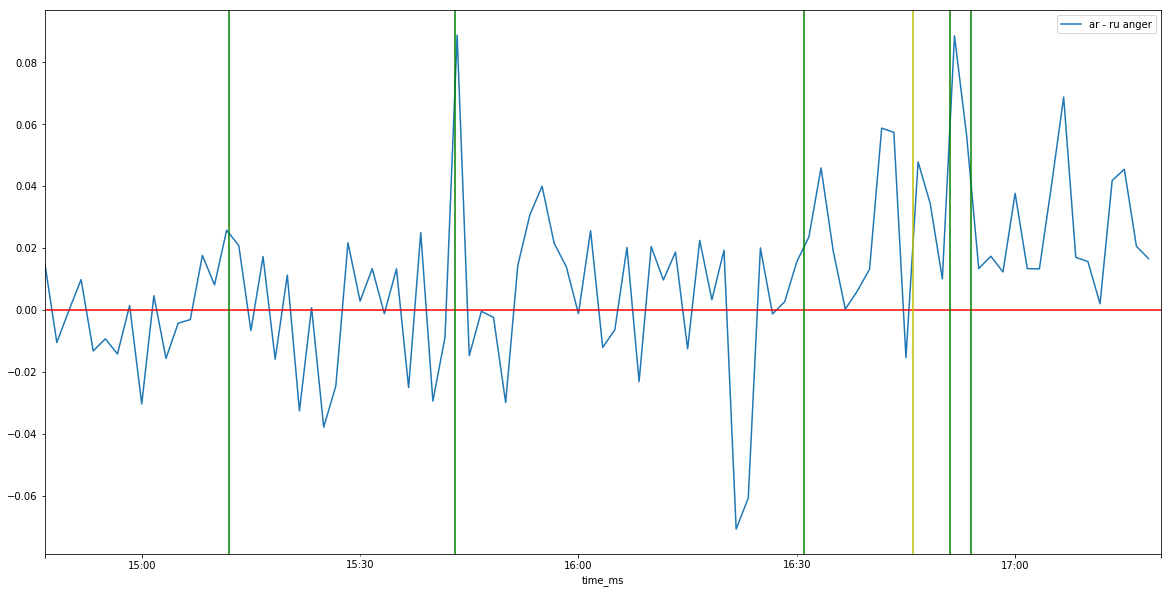

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# kickoff 17:01, 
# goal at: 12, 43, 71, 91, 94
# yellow ru at: 94
# yellow ar at: 88

df = pd.read_csv('first-game-panda-frame_med.csv')

df['time_ms'] = pd.to_datetime(df['time_ms'], unit='ms')
df = df.set_index('time_ms')

ar = df[df['lang'] == 'ar']
ru = df[df['lang'] == 'ru']

plt.figure(figsize=(20,10))

v = 'anger' #sentiment,anger,joy,sadness,fear,surprise
f = '100S'
#ar[v].resample(f).median().plot(label='ar {}'.format(v))
#ru[v].resample(f).median().plot(label='ru {}'.format(v))

(ar[v].resample(f).median() - ru[v].resample(f).median()).plot(label='ar - ru {}'.format(v))
plt.axhline(color='r')

from datetime import datetime
plt.axvline(x=datetime.strptime('2018-06-14 15:12', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 15:43', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:31', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:51', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:54', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:46', '%Y-%m-%d %H:%M'), color='y')

plt.legend(bbox_to_anchor=(1, 1))

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# kickoff 17:01, 
# goal at: 12, 43, 71, 91, 94
# yellow ru at: 94
# yellow ar at: 88

df = pd.read_csv('first-game-panda-frame_med.csv')

df['time_ms'] = pd.to_datetime(df['time_ms'], unit='ms')
df = df.set_index('time_ms')

ar = df[df['lang'] == 'ar']
ru = df[df['lang'] == 'ru']

ru

,Unnamed: 0,coord_x,coord_y,is_retweet,retweet_count,sentiment,anger,joy,sadness,fear,surprise,time,lang,loc,iso3166a2,iso3166a3,txt,user
time_ms,,,,,,,,,,,,,,,,,,
2018-06-14 14:47:32.524,17,37.61556,55.75222,0,0,0.551373,0.167599,0.044940,0.281381,0.497663,0.008416,2018-06-14 16:47:32.524000,ru,"Moscow, 48, RU",RU,RUS,"Эй, завистники, у нас будет лучший турнир в ис...",abushkin
2018-06-14 14:47:35.633,56,38.97603,45.04484,0,0,0.731806,0.149396,0.051098,0.414716,0.373424,0.011367,2018-06-14 16:47:35.633000,ru,"Krasnodar, 38, RU",RU,RUS,Ахахахахаэ\n#ЧМ2018 #WorldCup #RUS #РоссияСауд...,yakubenko_m
2018-06-14 14:47:39.367,114,-94.57857,39.09973,0,0,0.450905,0.222946,0.210849,0.156737,0.273680,0.135788,2018-06-14 16:47:39.367000,ru,"Kansas City, MO, US",US,USA,#ЧМ2018\nКароче давайте сегодня реально болеть...,plsburymeburyme
2018-06-14 14:47:41.196,135,100.00000,60.00000,0,0,0.771350,0.263691,0.140873,0.128240,0.192482,0.274714,2018-06-14 16:47:41.196000,ru,"Russia, 00, RU",RU,RUS,"Начинаем, ребят #ЧМ2018",P9f1TraMvyHDEMy
2018-06-14 14:47:42.877,159,19.03991,47.49801,0,0,0.344681,0.104025,0.064068,0.279935,0.544991,0.006980,2018-06-14 16:47:42.877000,ru,"Budapest, 05, HU",HU,HUN,"На Лужниках, кажется, играют в Колонизаторов....",Westlandermax
2018-06-14 14:47:43.532,167,39.18430,51.67204,0,0,0.493887,0.112772,0.064210,0.343106,0.475203,0.004709,2018-06-14 16:47:43.532000,ru,"Voronezh, 86, RU",RU,RUS,"Я начала интересоваться футболом, в 2008 году,...",SakuraKatarina
2018-06-14 14:47:53.402,301,-68.58333,-33.00000,0,0,0.808837,0.304070,0.152851,0.133730,0.201130,0.208220,2018-06-14 16:47:53.402000,ru,"Departamento de Maipú, 13, AR",AR,ARG,#ЧМ2018 Я хочу быть в Россия 😖 приветствия из ...,Rami_Gil
2018-06-14 14:47:56.870,340,56.25017,58.01046,1,0,0.538678,0.124502,0.053813,0.421907,0.388527,0.011251,2018-06-14 16:47:56.870000,ru,"Perm, 90, RU",RU,RUS,"RT @sportsru: Это не фотошоп, а реальная опора...",mv_knyazev
2018-06-14 14:48:08.068,497,-86.50000,15.00000,1,0,0.416566,0.183528,0.270591,0.141940,0.160652,0.243289,2018-06-14 16:48:08.068000,ru,"Honduras, 00, HN",HN,HND,RT @rianru: #РИА_Видео \n70-летний болельщик и...,Jendoroman
